In [57]:
from itertools import combinations
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
import pandas as pd
from sklearn.datasets import load_diabetes

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [12]:
X[:, (2,4)].shape

(442, 2)

In [17]:
final_winners = {}
for r in range(2, 10):
    print('processing : ', r)
    scores = []
    for feature_comb in list(combinations(range(10), r)):
        scores.append(np.mean(
            cross_val_score(LinearRegression(), X[:, feature_comb],
                y, cv =2)))
    final_winners[r] = max(scores), scores


processing :  2
processing :  3
processing :  4
processing :  5
processing :  6
processing :  7
processing :  8
processing :  9


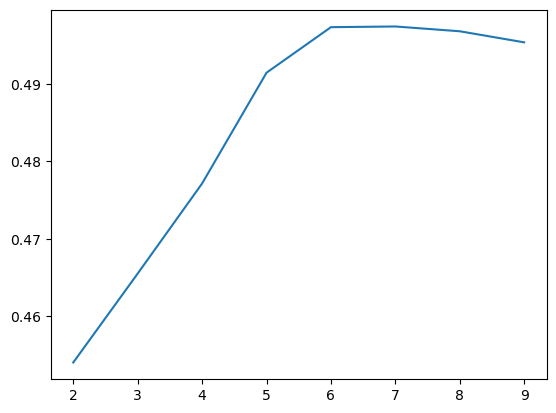

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(2, 10), [v[0] for k, v in final_winners.items()])

> ## Feature elimination

In [21]:
from sklearn.feature_selection import RFECV

In [34]:
rfe_cv = RFECV(LinearRegression(), cv=3, scoring='r2')

In [35]:
rfe_cv.fit(X, y)

RFECV(cv=3, estimator=LinearRegression(), scoring='r2')

<AxesSubplot: >

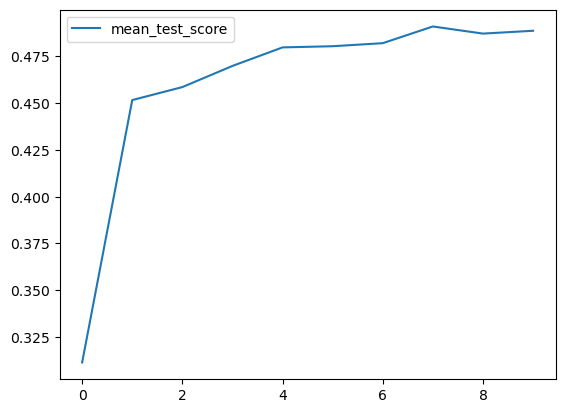

In [39]:
pd.DataFrame(rfe_cv.cv_results_).plot(y='mean_test_score')

Another [example](https://scikit-learn.org/dev/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py) from sklearn documentation



In [76]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 3, 100), cv=5).fit(X, y)
print('best alpha', lasso_cv.alpha_)

best alpha 0.003593813663804626


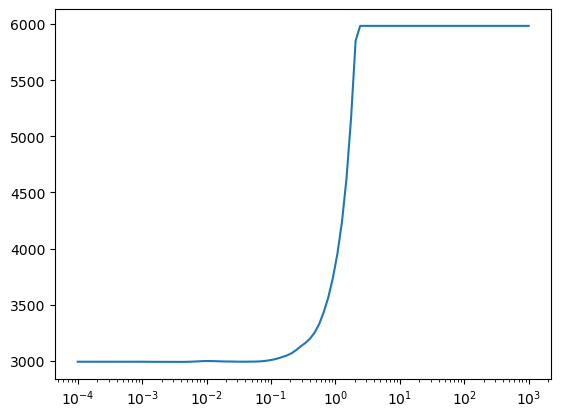

In [77]:
plt.semilogx(lasso_cv.alphas_,lasso_cv.mse_path_.mean(axis=1))

In [82]:
lasso_cv.coef_

array([  -6.59934047, -236.2136531 ,  521.61475687,  321.15859092,
       -571.59162241,  304.68569496,    0.        ,  142.95196977,
        670.90263704,   66.90465333])

In [79]:
ridge_cv = RidgeCV(alphas=np.logspace(-4, 3, 100), cv=5).fit(X, y)
print('best alpha', ridge_cv.alpha_)

best alpha 0.0003678379771828634


In [83]:
ridge_cv.coef_

array([  -9.8308041 , -239.53682094,  520.06261602,  324.16854168,
       -760.72401879,  451.78274784,   87.15513597,  173.28685965,
        739.34069189,   67.81711982])

> # dimensionality reduction example 
https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html